In [1]:
#Get directory path
import os
os.getcwd( )

'C:\\Users\\sajan\\OneDrive\\Documents'

In [3]:
os.chdir('C:\\Users\\sajan\\OneDrive\\Documents')
path = os.getcwd( )
path

'C:\\Users\\sajan\\OneDrive\\Documents'

In [4]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
# load through url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
url_data = pd.read_csv(url, names = attributes)
url_data.columns = attributes
url_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch

In [32]:
raw_data = pd.read_csv('data/flood.csv')
raw_data.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


# visualize the data

C:\Users\sajan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


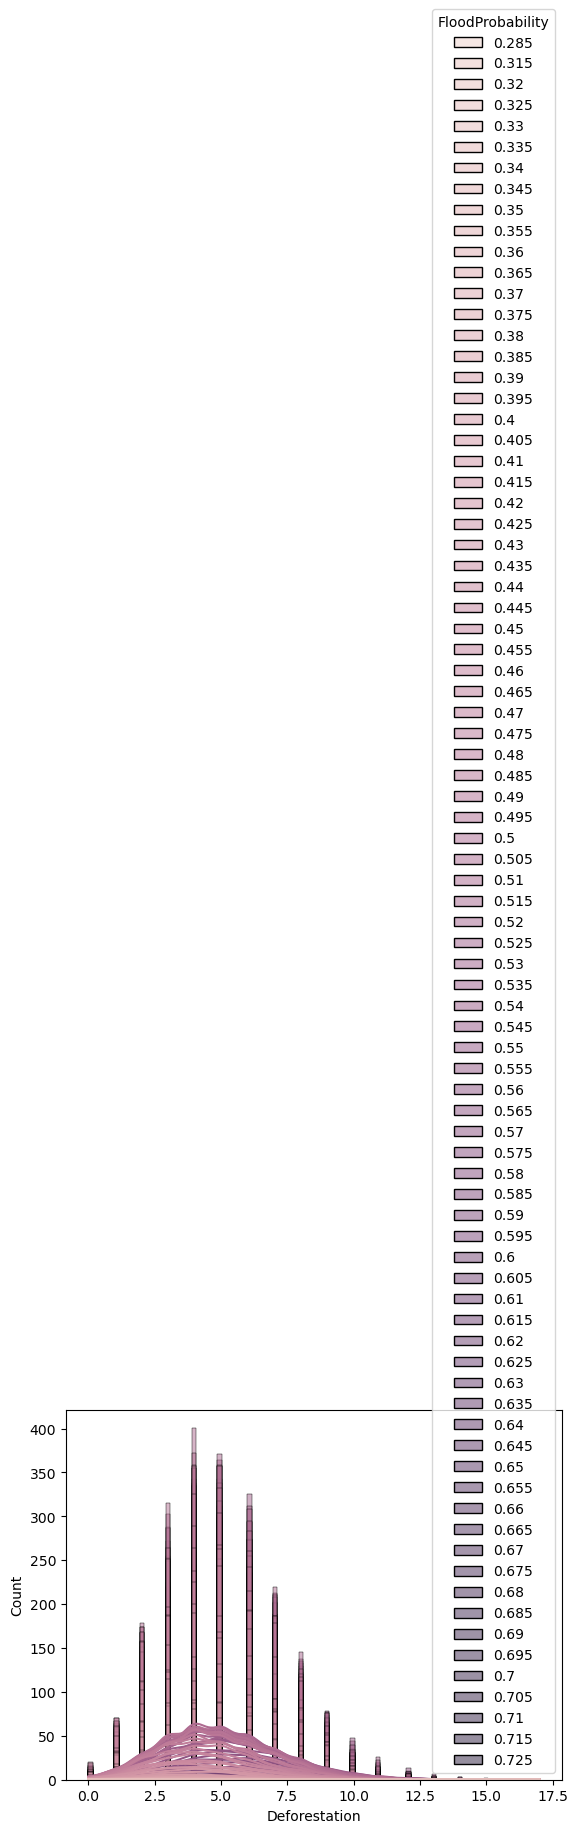

In [36]:
sns.histplot(data = raw_data, x='Deforestation', kde=True, hue='FloodProbability')
plt.show()

In [38]:
raw_data.shape

(50000, 21)

In [40]:
raw_data.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [45]:
test_df = raw_data[['RiverManagement', 'DamsQuality',  'DrainageSystems', 'CoastalVulnerability',  'Watersheds', 'DeterioratingInfrastructure',   'InadequatePlanning', 'FloodProbability']]
test_df.head()

,RiverManagement,DamsQuality,DrainageSystems,CoastalVulnerability,Watersheds,DeterioratingInfrastructure,InadequatePlanning,FloodProbability
0,6,6,10,7,2,3,2,0.450
1,5,1,9,2,2,1,1,0.475
2,4,4,7,4,8,6,3,0.515
3,2,1,4,2,6,8,6,0.520
4,5,5,7,6,3,3,3,0.475


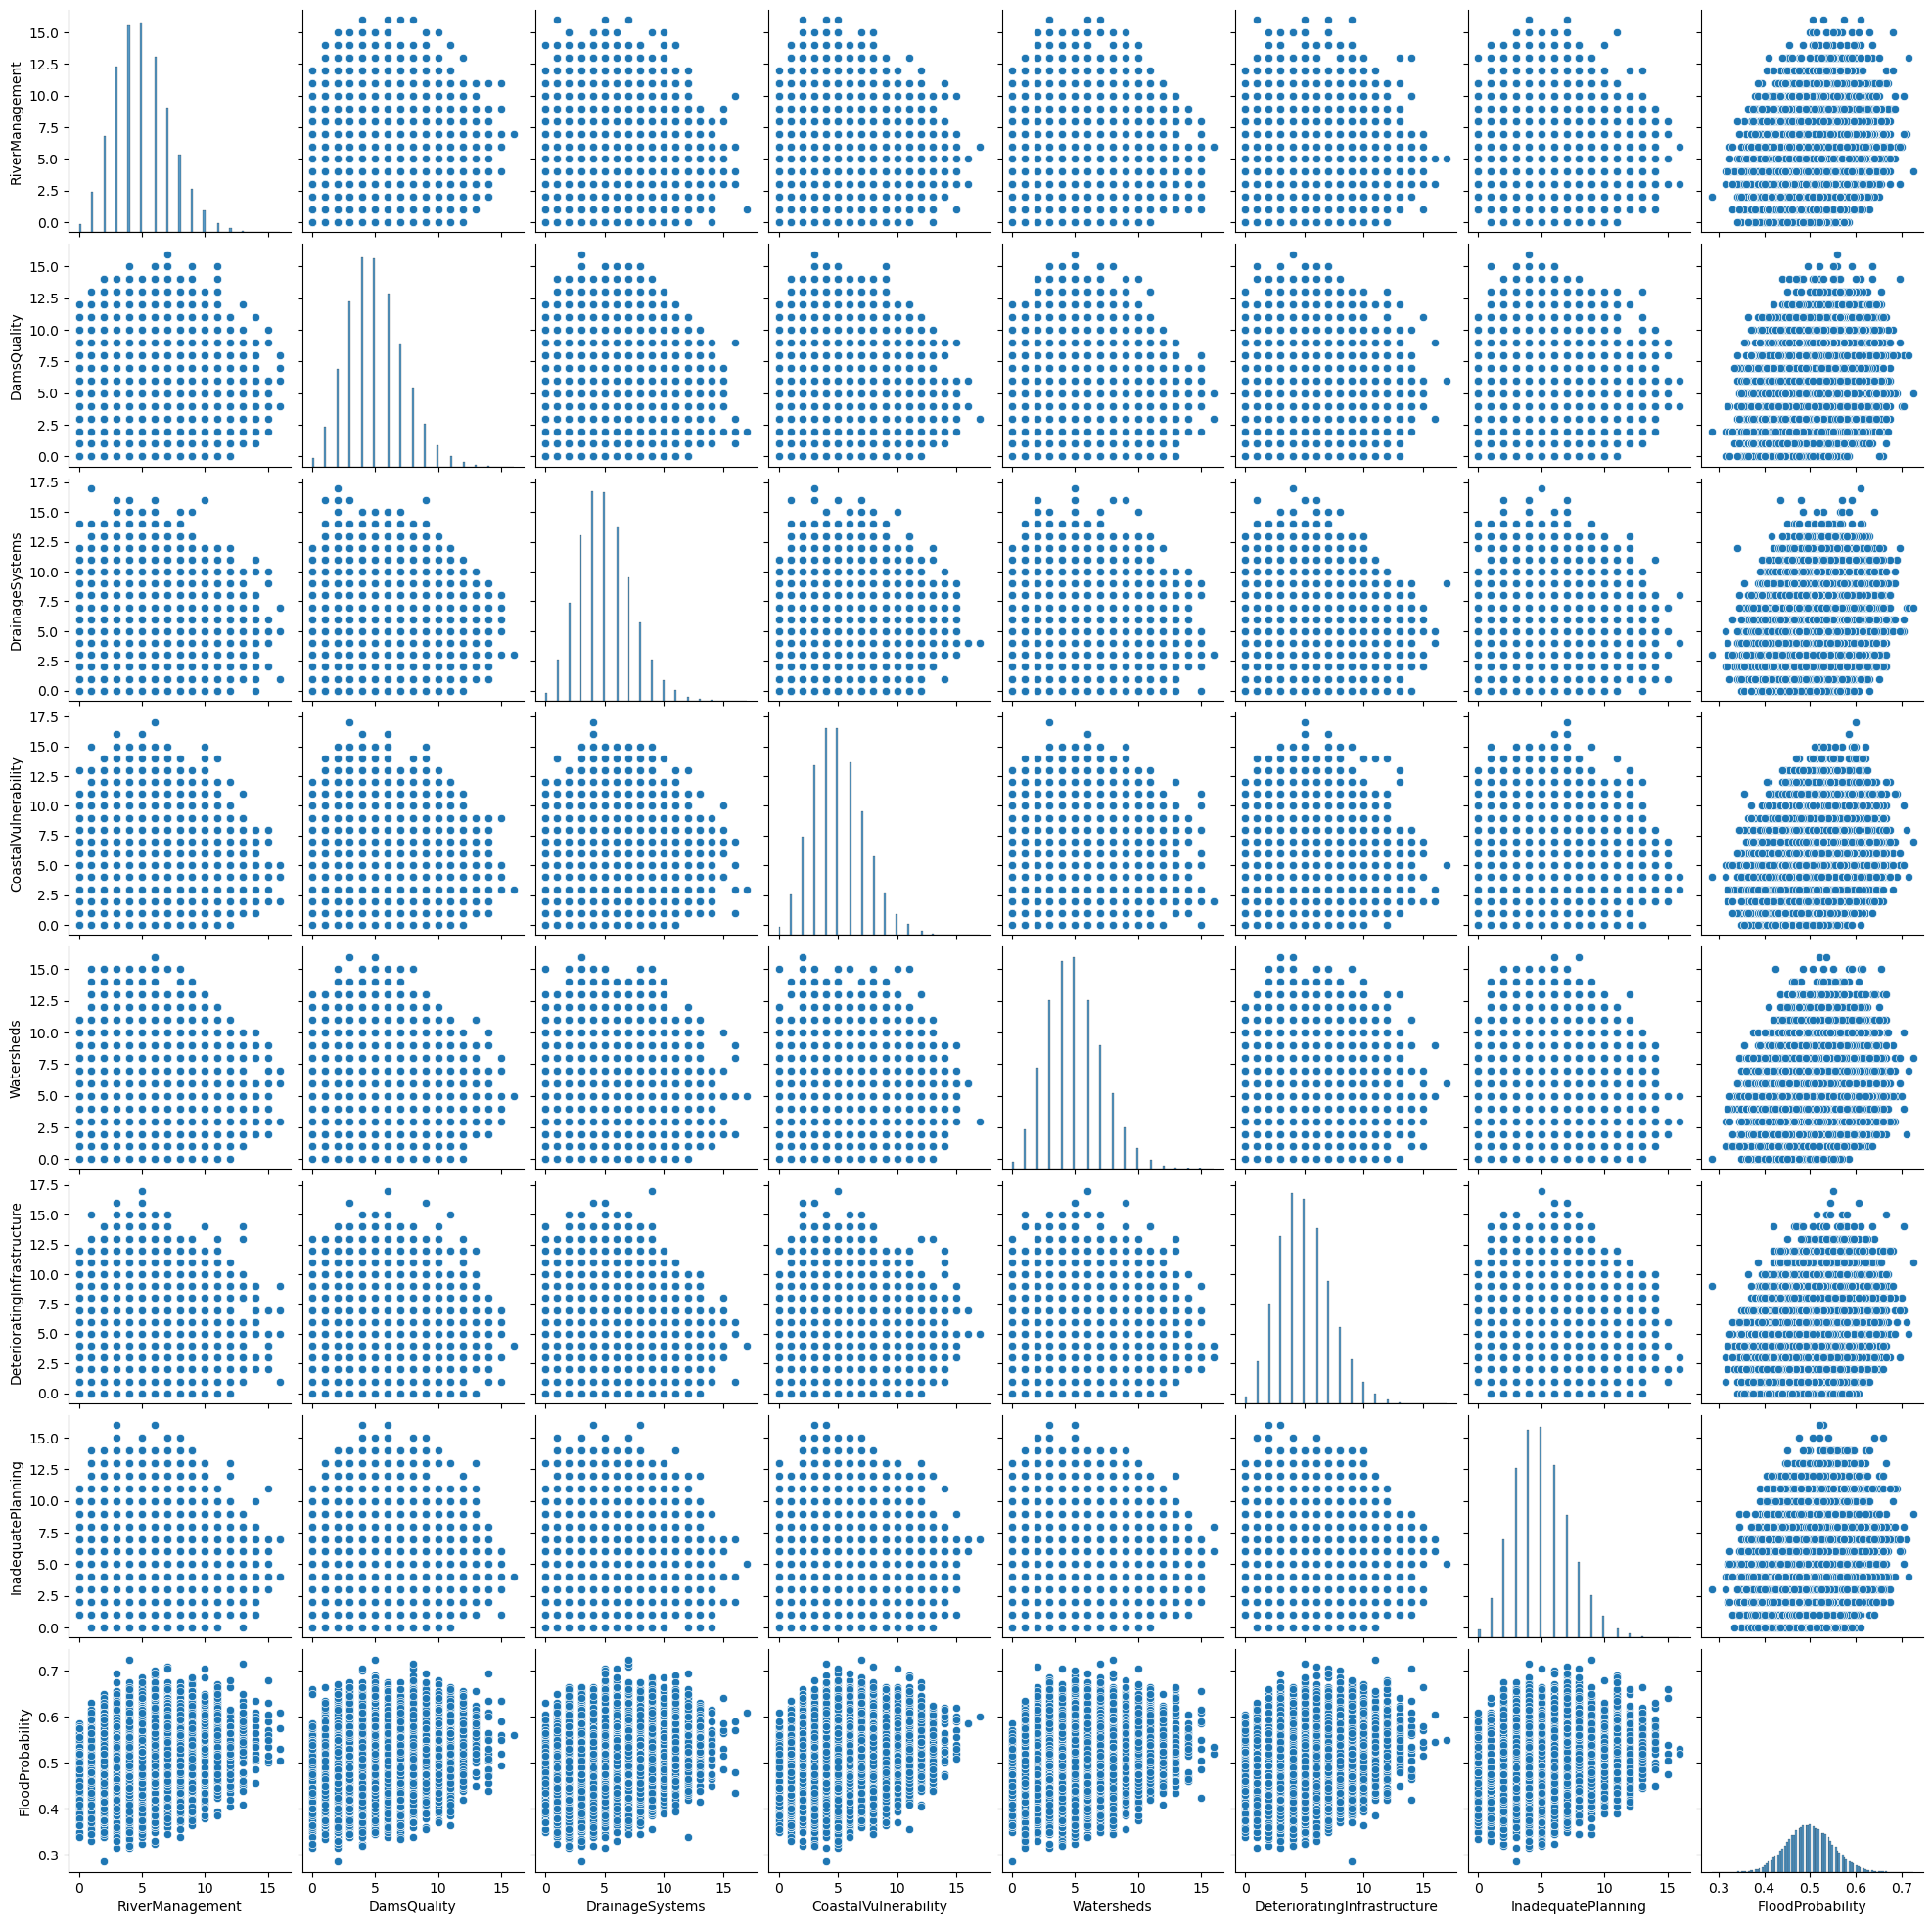

In [46]:
sns.pairplot(test_df)
plt.show()

In [47]:
test_df = raw_data[['RiverManagement', 'DamsQuality',  'DrainageSystems', 'CoastalVulnerability',  'Watersheds', 'FloodProbability']]
test_df.head()

,RiverManagement,DamsQuality,DrainageSystems,CoastalVulnerability,Watersheds,FloodProbability
0,6,6,10,7,2,0.450
1,5,1,9,2,2,0.475
2,4,4,7,4,8,0.515
3,2,1,4,2,6,0.520
4,5,5,7,6,3,0.475


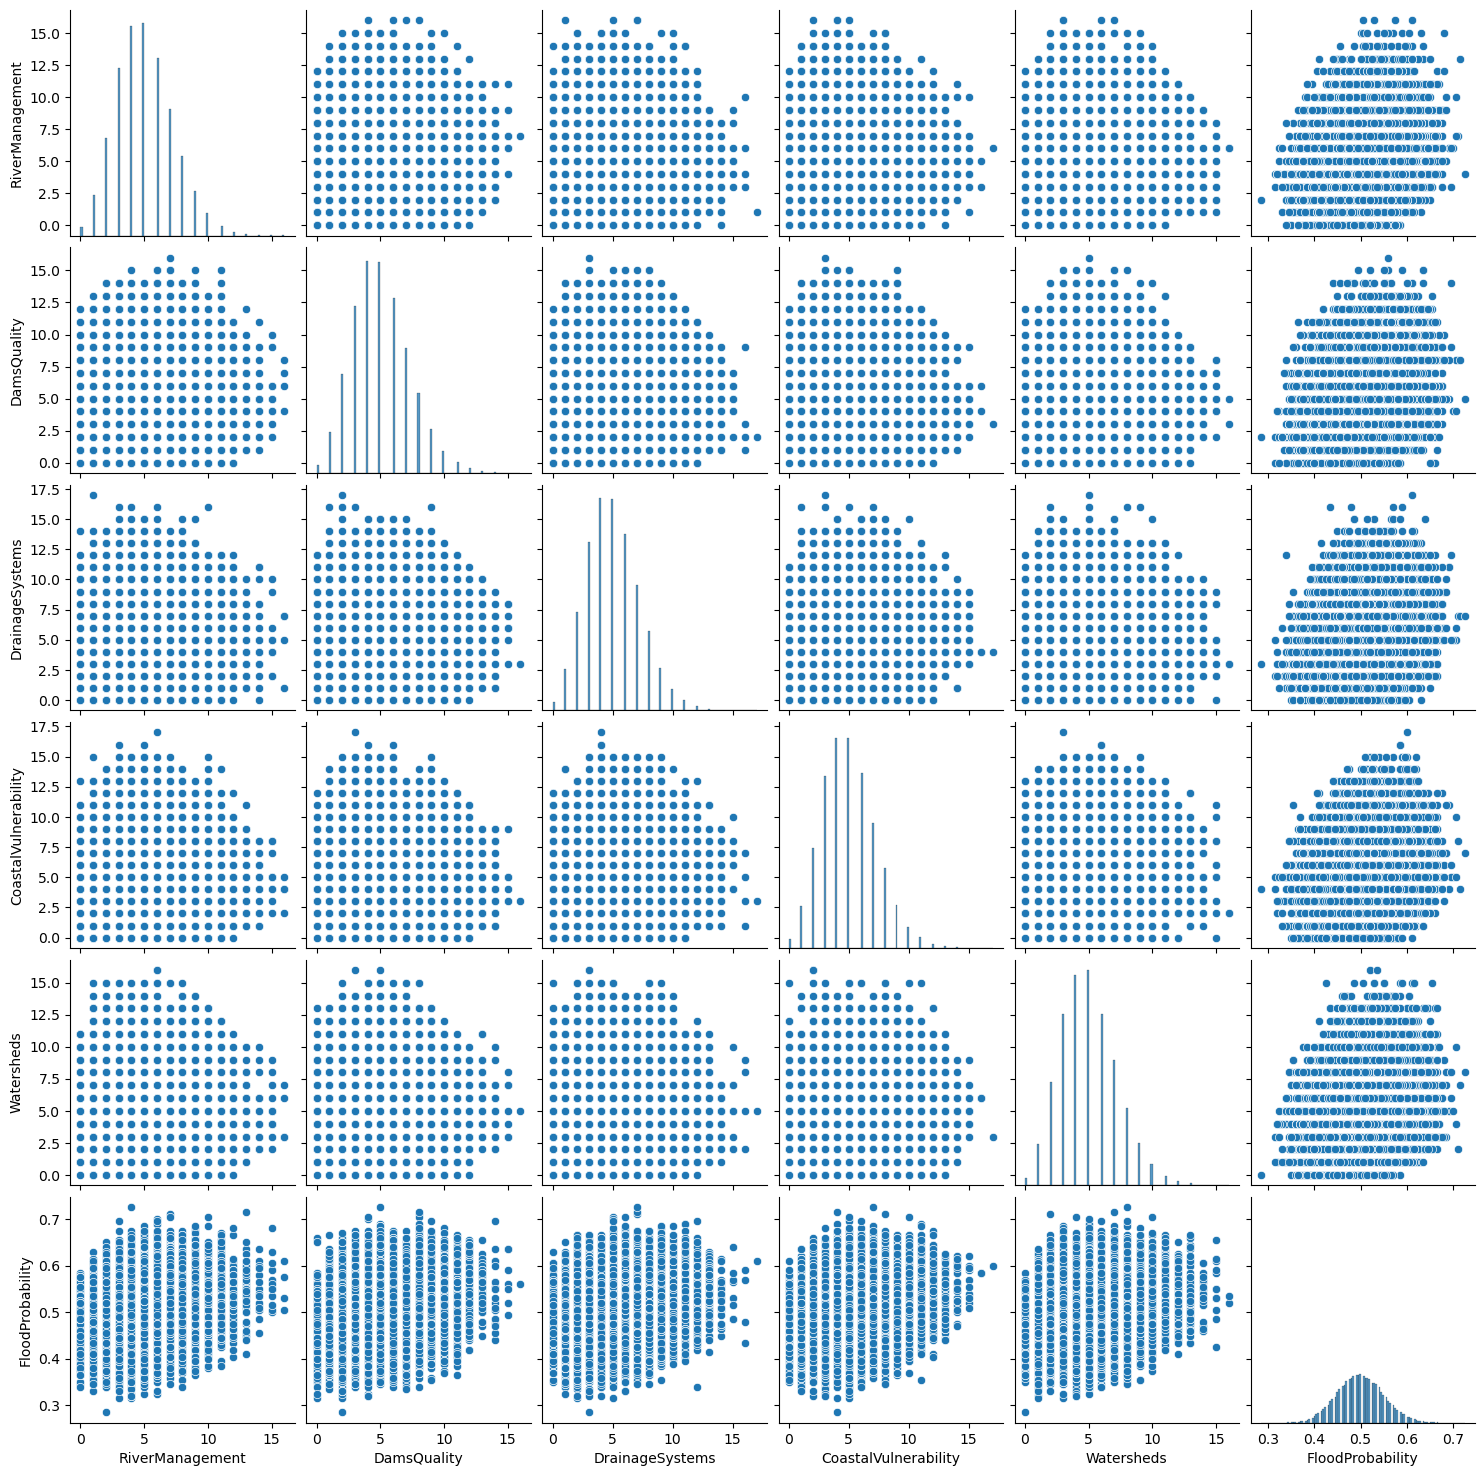

In [48]:
sns.pairplot(test_df)
plt.show()

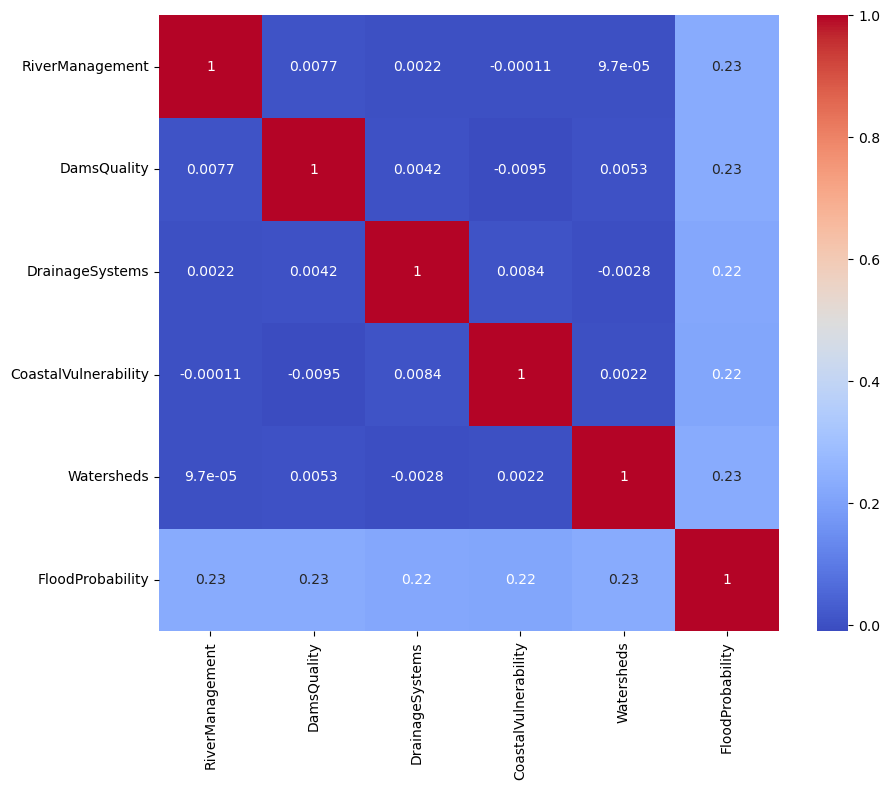

In [50]:
corr_df = raw_data[['RiverManagement', 'DamsQuality',  'DrainageSystems', 'CoastalVulnerability',  'Watersheds', 'FloodProbability']]

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# create the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm' , annot=True)
plt.show()